# Predicting Crab Age

<img src="./Fiddler-crab-isolated.jpeg" alt="drawing" width="700"/>

We'll be using a dataset from kaggle that contains 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight', 'Age', Sex. We are trying to predict the age of a crab in months based on the the other given variables.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import svm
from math import sqrt

In [2]:
df = pd.read_csv('../data/CrabAgePrediction.csv')
df.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.175,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.650,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.775,0.2500,7.952035,3.231843,1.601747,2.764076,6


In [3]:
df.shape

(3893, 9)

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [5]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Text(0.5, 1.0, 'Distribution of Age')

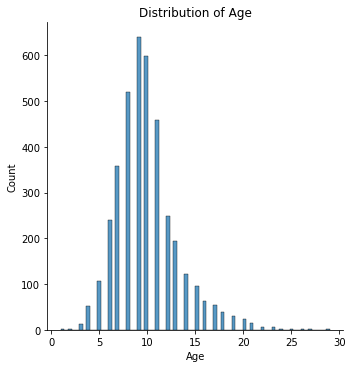

In [6]:
sns.displot(df['Age']);
plt.title('Distribution of Age')

- Here we can see the distribution of **Age** it varies from 1 to 29 month and the mean centered around 10 month

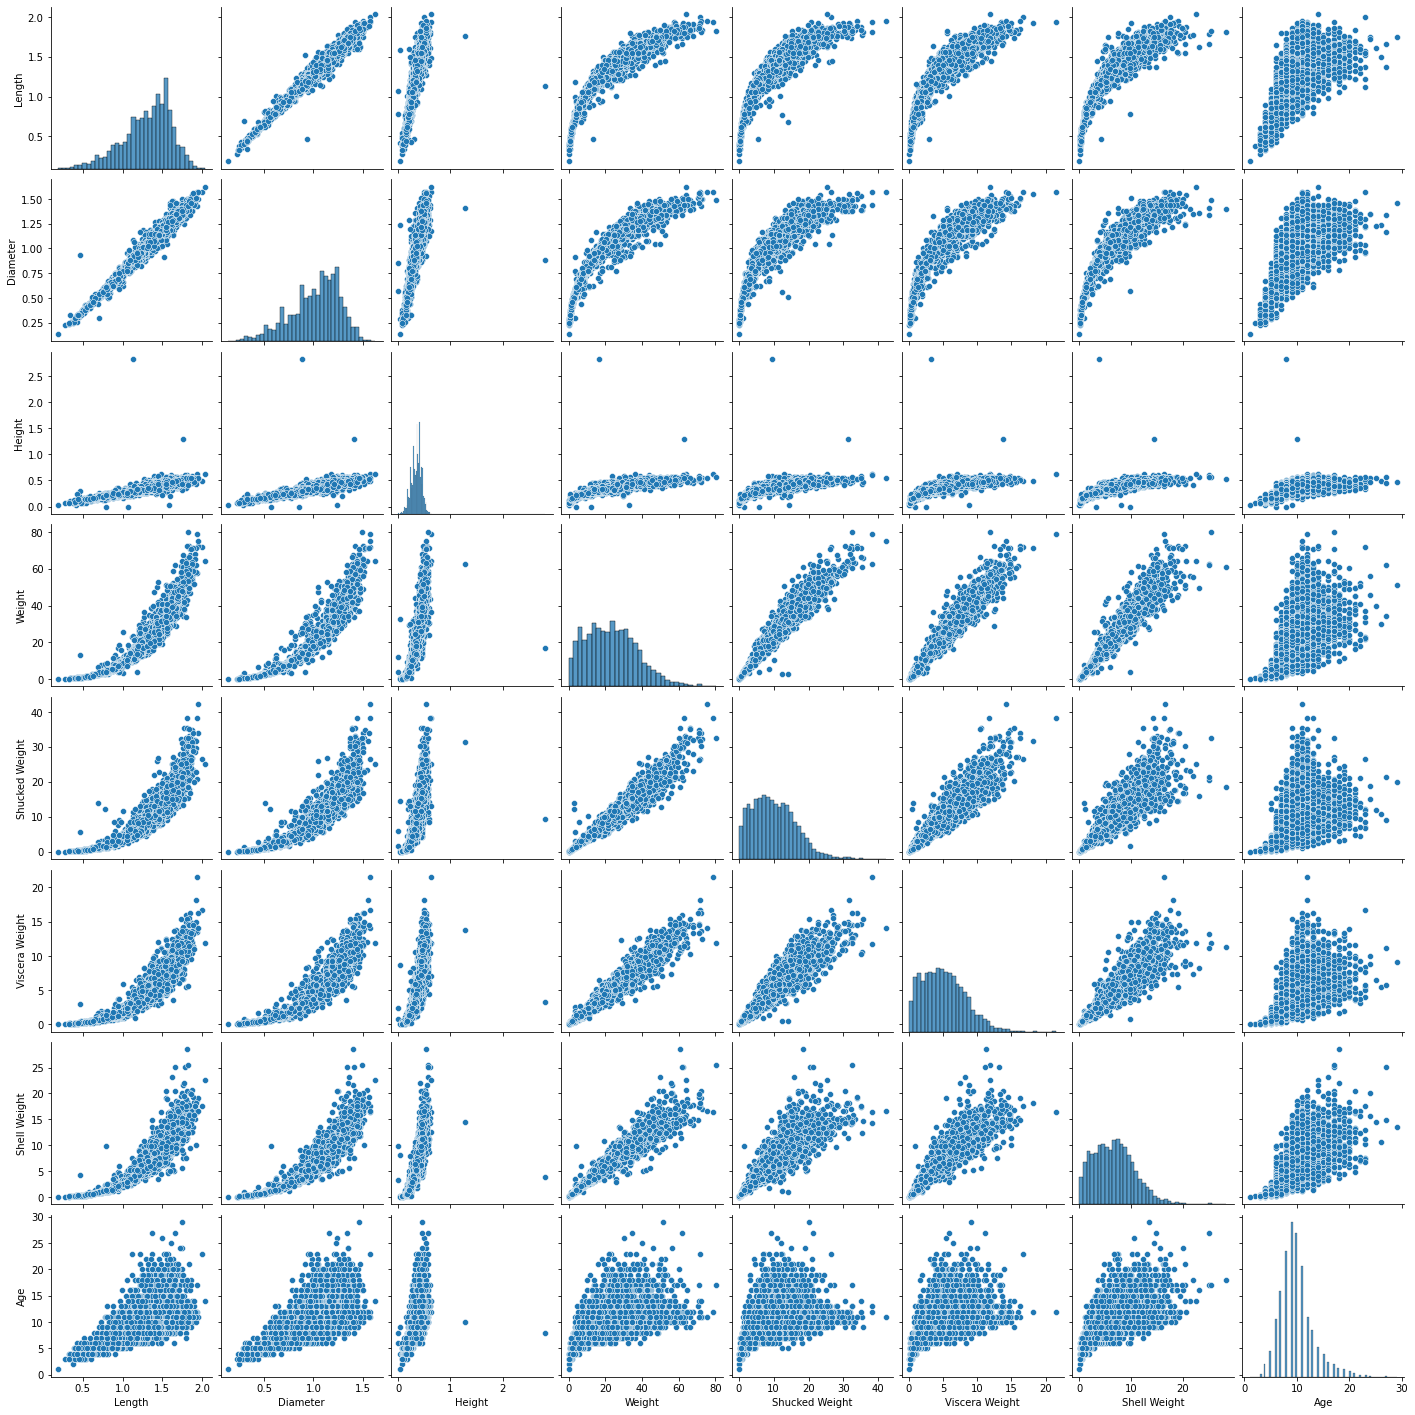

In [7]:
sns.pairplot(df);

- Here we can see that outliers especially in the **height** 

Text(0.5, 1.0, 'Height Outliers By Age')

<Figure size 500x400 with 0 Axes>

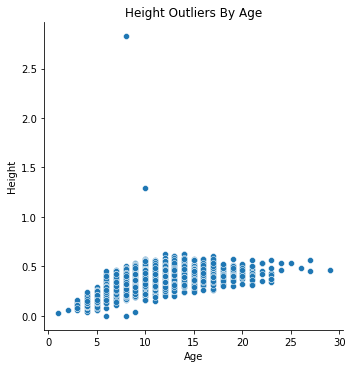

In [8]:
plt.figure(figsize=(5,4), dpi=100)
sns.relplot(x = "Age", y = "Height", data = df);
plt.title('Height Outliers By Age')

In [9]:
df.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


# EDA

In [10]:
sns.set_style("whitegrid")

<Figure size 1200x1200 with 0 Axes>

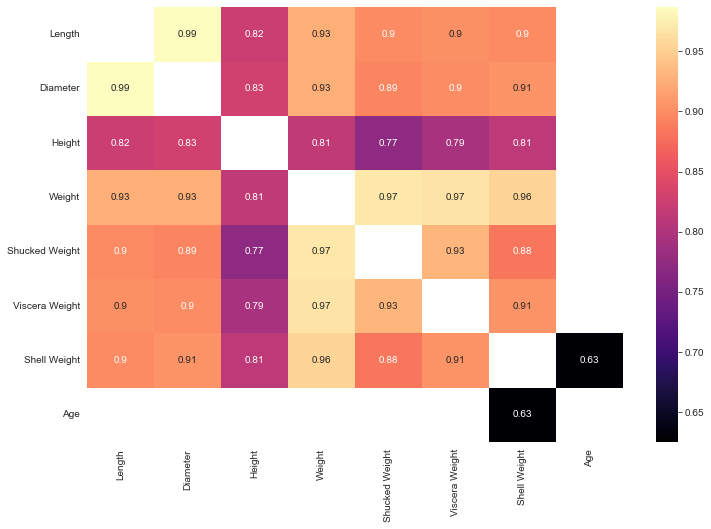

In [11]:
plt.figure(figsize=(8,8), dpi=150)
df_corr = df.corr()

kot = df_corr[((df_corr>=.6 )| (df_corr <= -.6)) & (df_corr !=1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap='magma', annot=True);

**- Here we can see the highets correlations between weight, shell weight, viscera weight, Diameter and Length**

In [12]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [41]:
feature_corr = pd.DataFrame(corrFilter(df, .6), columns=['correlation'])
feature_corr.sort_values(by='correlation', ascending=False).head(10)

correlation
Diameter       Length             0.986634
Weight         Shucked Weight     0.969039
Viscera Weight Weight             0.965489
Shell Weight   Weight             0.955912
Shucked Weight Viscera Weight     0.931139
Diameter       Weight             0.925822
Length         Weight             0.925446
Diameter       Height             0.908089
Shell Weight   Viscera Weight     0.906614
               Diameter           0.906307

<Figure size 500x400 with 0 Axes>

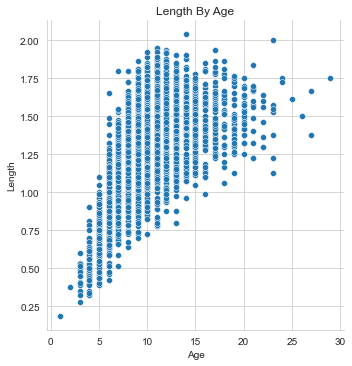

In [14]:
plt.figure(figsize=(5,4), dpi=100)
sns.relplot(x = "Age", y = "Length", data = df)
plt.title('Length By Age');

**- Here we can see that yonger crabs are shorter and older crabs are longer, with some outliers on the age**

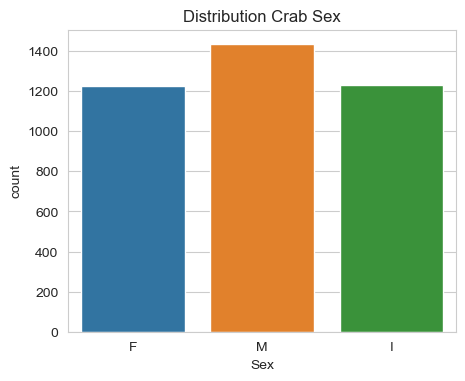

In [15]:
plt.figure(figsize=(5,4), dpi=100)

sns.countplot(x = "Sex", data = df)
plt.title('Distribution Crab Sex');

In [16]:
df['Sex'].value_counts(normalize=True)

M    0.368610
I    0.316722
F    0.314667
Name: Sex, dtype: float64

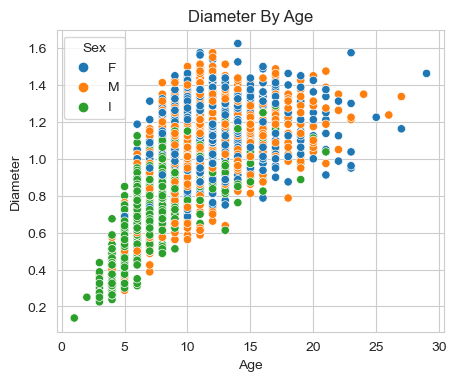

In [17]:
plt.figure(figsize=(5,4), dpi=100)
sns.scatterplot(data=df, x="Age", y="Diameter", hue="Sex");
plt.title('Diameter By Age');

**- We can notice here that most of the unidentified sex crabs are yonger in age, female crabs tends to be bigger and tend to live longer**

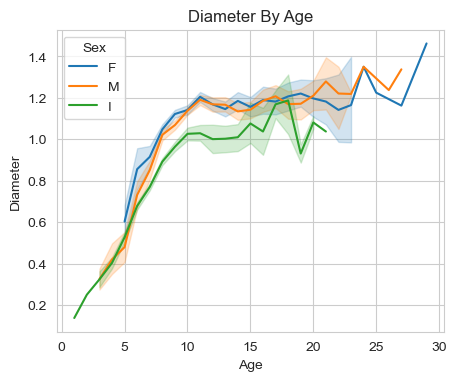

In [18]:
plt.figure(figsize=(5,4), dpi=100)
sns.lineplot(data=df, x="Age", y="Diameter", hue="Sex")
plt.title('Diameter By Age');

Text(0.5, 1.0, 'baseline')

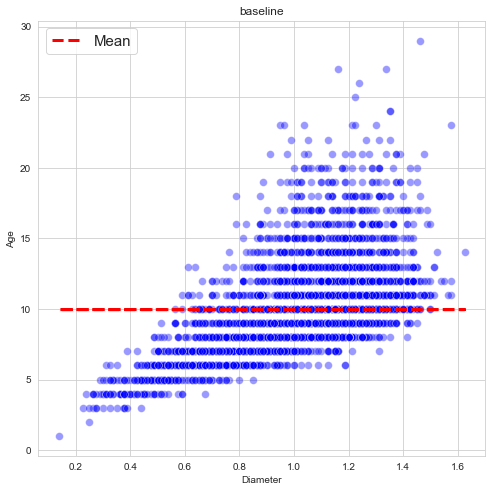

In [20]:
plt.figure(figsize=(8,8))
mean = [np.mean(df['Age'])]* len(df['Diameter'])
sns.scatterplot(x =df['Diameter'],y = df['Age'],color='blue',alpha=.4,s=60)
plt.plot(df['Diameter'],mean,label='Mean', linestyle='--', color='red', linewidth=3)
plt.legend(fontsize=15);
plt.title('baseline')

# Baseline Model

In [21]:
df = pd.get_dummies(df, columns = ['Sex'])

In [22]:
y = df['Age']
X = df.drop(columns=['Age'])

In [23]:
df_baseline = df

In [24]:
df_baseline['baseline'] = df_baseline['Age'].mean()
df_baseline.head(3)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,baseline
0,1.4375,1.175,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0,9.954791
1,0.8875,0.650,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1,9.954791
2,1.0375,0.775,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0,9.954791


In [25]:
print('MAE:', round(metrics.mean_absolute_error(df_baseline['Age'], df_baseline['baseline']), 3))
print('MSE:', round(metrics.mean_squared_error(df_baseline['Age'], df_baseline['baseline']),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(df_baseline['Age'], df_baseline['baseline'])),3))

MAE: 2.357
MSE: 10.372
RMSE: 3.221


Based on our baseline model, if we predict the average age each time, we get an RMSE score of 3.221 which means that's on average our predictions would be off by 3.2 months.

# Linear Regression

In [26]:
df = df[df['Height'] < 1] 
df = df[df['Height'] > 0]

In [27]:
y = df['Age']
X = df.drop(columns=['Age', 'baseline'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.56353491  4.26802387  9.60226008  0.30265752 -0.67880548 -0.42854369
  0.28154298  0.27357386 -0.58922573  0.31565187]


In [32]:
preds = lm.predict(X_test)

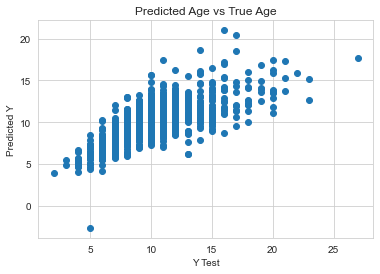

In [33]:
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Predicted Age vs True Age');

In [34]:
print('MAE:', round(metrics.mean_absolute_error(y_test, preds), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, preds),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, preds)),3))

MAE: 1.559
MSE: 4.525
RMSE: 2.127


We see an improvement in our linear regression model. Our RMSE here is 2.127 meaning, using this model our prediction for age would be off by 2.1 months on average. 

In [35]:
lm.score(X_train, y_train), lm.score(X_test, y_test)

(0.5483684445437658, 0.5258208199232678)

In [36]:
coefs = pd.DataFrame(lm.coef_,X.columns)
coefs.columns = ['Coeffecient']
coefs

,Coeffecient
Length,-0.563535
Diameter,4.268024
Height,9.602260
Weight,0.302658
Shucked Weight,-0.678805
Viscera Weight,-0.428544
Shell Weight,0.281543
Sex_F,0.273574
Sex_I,-0.589226
Sex_M,0.315652


# More Models

In [37]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [38]:
lr = LinearRegression()
svm = svm.SVR()
list_of_classifiers = [lr,svm]

In [39]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    each.fit(X_train_ss, y_train)
    print('Training score:')
    print(each.score(X_train_ss, y_train))
    print('Testing score:')
    print(each.score(X_test_ss, y_test))
    print()

LinearRegression
Training score:
0.5483684445437657
Testing score:
0.5258208199232688

SVR
Training score:
0.5483771616583626
Testing score:
0.5336444883006386



In [40]:
for each in list_of_classifiers:
    print(str(each).split('(')[0])
    pred = each.predict(X_train_ss)
    print('Train RMSE: ')
    print(sqrt(mean_squared_error(y_train, pred)))
    print('Testing RMSE: ')
    pred = each.predict(X_test_ss)
    print(sqrt(mean_squared_error(y_test, pred)))
    print()

LinearRegression
Train RMSE: 
2.2018008844888146
Testing RMSE: 
2.127162939908648

SVR
Train RMSE: 
2.2017796354828345
Testing RMSE: 
2.109541503783174



Here, we got a lower RMSE using SVR model. Our RMSE with SVR is around 2.11 meaning, using this model our prediction for age would be off by 2.1 months on average.